# **Installation of Libraries**

In [1]:
!pip install alibi
!pip install lazypredict
!pip instll scikitlearn
!pip install contractions
!pip install textstat
!pip install pdpbox==0.2.0
!pip install eli5
!pip install shap
!pip install pyforest
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.4 MB/s eta 0:00:00
ERROR: unknown command "instll" - maybe you meant "install"
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 MB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pdpbox: filename=PDPbox-0.2.0-py3-none-any.whl size=57690701 sha256=918646e413e2400f4be96a9c062e711185f48fcbe7da3e1dd67c14104cdbe78a
  Stored in directory: /root/.cache/pip/wheels/02/07/20/3167ac76ff2b47abf544ea69195343b572d059e6

In [3]:
import pandas as pd
import os
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('wordnet')
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
import re
from bs4 import BeautifulSoup
import contractions
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.probability import FreqDist
from nltk import bigrams
from nltk.tokenize import word_tokenize
import string
import math
from collections import Counter
from nltk.util import bigrams

In [5]:
import textstat
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [6]:
balanced_dataset = pd.read_csv('balanced_dataset.csv')
balanced_dataset.drop(columns=['pmi_scores'],inplace=True)
balanced_dataset.to_csv('dataset.csv', index=False)

# **Correlation Matrix**

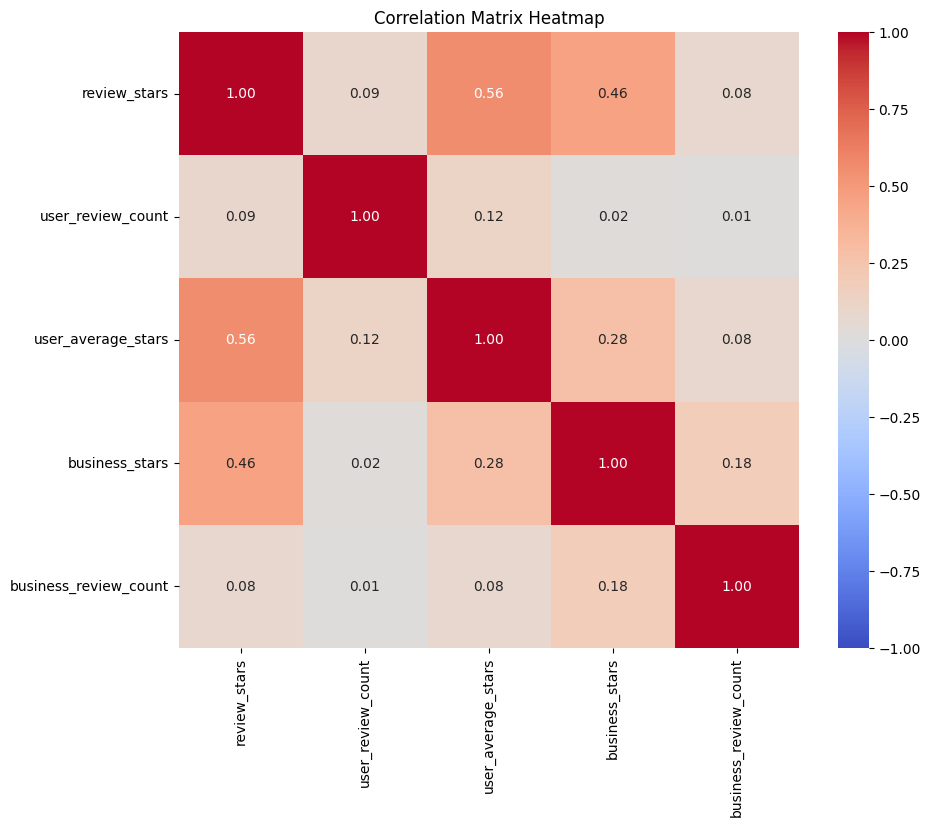

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the balanced dataset from the saved CSV file
balanced_dataset = pd.read_csv('dataset.csv')

# Calculate the correlation matrix
correlation_matrix = balanced_dataset.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Data Pre-Processing**

In [9]:
# Remove HTML tags and URLs
def remove_html_and_urls(text):
  if pd.isna(text):
    return ""
  text = BeautifulSoup(text, 'html.parser').get_text()
  text = re.sub(r'http\S+', '', text)
  return text

In [10]:
balanced_dataset['review_text'] = balanced_dataset['review_text'].apply(remove_html_and_urls)

# Remove non-alphabetical characters
balanced_dataset['review_text'] = balanced_dataset['review_text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Remove extra spaces
balanced_dataset['review_text'] = balanced_dataset['review_text'].apply(lambda x: ' '.join(x.split()))

# Perform contractions
balanced_dataset['review_text'] = balanced_dataset['review_text'].apply(lambda x: contractions.fix(x))


In [11]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word.lower() not in stop_words]
    # Rejoin the words to form cleaned text
    cleaned_text = ' '.join(words)
    return cleaned_text

In [12]:
balanced_dataset['review_text'] = balanced_dataset['review_text'].apply(remove_stopwords)

# **PMI Calculation**

In [13]:
word_list = {
    'positive_word':['great', 'good', 'like', 'just', 'will', 'well', 'even', 'love',
    'best', 'better', 'back', 'want', 'recommend', 'worth', 'easy', 'sound', 'right',
                    'excellent', 'nice', 'real', 'fun', 'sure', 'pretty', 'interesting', 'stars'],

    'negative_word':['too', 'little', 'bad', 'game', 'down', 'long', 'hard', 'waste',
                     'disappointed', 'problem', 'try', 'poor', 'less', 'boring', 'worst',
                     'trying', 'wrong', 'least', 'although', 'problems', 'cheap']

}

In [14]:
positive_words = {word: 1 for word in word_list['positive_word']}
negative_words = {word: -1 for word in word_list['negative_word']}

# Function to preprocess text
def preprocess_text(sentences):
    stop_words = set(stopwords.words('english'))
    tokenizer = WordPunctTokenizer()

    all_tokens = []
    for sentence in sentences:
        text = str(sentence)
        text = ''.join(char for char in text.lower() if char.isalpha() or char.isspace())
        text = contractions.fix(text)
        tokens = tokenizer.tokenize(text)
        all_tokens.extend(token for token in tokens if token not in stop_words)
    return all_tokens

# Tokenize and preprocess sentences
all_tokens = preprocess_text(balanced_dataset['review_text'])

# Efficient co-occurrence calculation
co_occurrences = Counter(bigrams(all_tokens))
word_counts = Counter(all_tokens)
total_tokens = len(all_tokens)

In [15]:
# Function to calculate PMI
def calculate_pmi(p_w1_w2, p_w1, p_w2, polarity_w1, polarity_w2):
    if p_w1 == 0 or p_w2 == 0 or p_w1_w2 == 0:
        return 0
    pmi = math.log2(p_w1_w2 / (p_w1 * p_w2))
    if polarity_w1 == 1 and polarity_w2 == 0:
        pmi *= -1
    return max(0, pmi)

# Calculate PMI scores
pmi_scores = {}

for word in word_counts:
    if word not in positive_words and word not in negative_words:
        p_w1 = word_counts[word] / total_tokens
        polarity_w1 = positive_words.get(word, negative_words.get(word, 0))

        pmi_positive = sum(calculate_pmi(co_occurrences.get((word, pos_word), 0) / total_tokens, p_w1, word_counts.get(pos_word, 0) / total_tokens, polarity_w1, positive_words.get(pos_word, 0)) for pos_word in positive_words)
        pmi_negative = sum(calculate_pmi(co_occurrences.get((word, neg_word), 0) / total_tokens, p_w1, word_counts.get(neg_word, 0) / total_tokens, polarity_w1, negative_words.get(neg_word, 0)) for neg_word in negative_words)

        pmi_scores[word] = pmi_positive - pmi_negative

# Determine the polarity of each word
positive_candidates = [word for word, score in pmi_scores.items() if score > 0]
negative_candidates = [word for word, score in pmi_scores.items() if score < 0]

# Print the results
print("Positive Words:", positive_candidates)
print("Negative Words:", negative_candidates)

Positive Words: ['ill', 'salon', 'came', 'brandon', 'first', 'would', 'said', 'know', 'really', 'schedule', 'ruined', 'square', 'barely', 'oh', 'wanted', 'honestly', 'one', 'could', 'rate', 'negative', 'birthday', 'haircuts', 'went', 'bob', 'hair', 'seemed', 'super', 'started', 'cutting', 'mind', 'cuts', 'flat', 'layer', 'done', 'also', 'poked', 'process', 'noticed', 'uneven', 'looked', 'see', 'chunks', 'purchased', 'flower', 'girls', 'dresses', 'shop', 'owner', 'patient', 'several', 'get', 'beautiful', 'bottom', 'discussed', 'detail', 'fit', 'understood', 'thought', 'look', 'color', 'called', 'sister', 'two', 'yes', 'mentioning', 'days', 'something', 'weekend', 'girl', 'immediately', 'going', 'issue', 'options', 'fabric', 'extra', 'probably', 'alterations', 'much', 'agreed', 'compare', 'thank', 'god', 'basically', 'refused', 'responded', 'ones', 'darker', 'pictures', 'actually', 'especially', 'light', 'silver', 'service', 'improvement', 'anyone', 'drivethru', 'audacity', 'food', 'thin

In [16]:
for i in word_list['positive_word']:
    pmi_scores[i]=1
for i in word_list['negative_word']:
    pmi_scores[i]=-1

In [17]:
pmi_lst=[]
for i in balanced_dataset['review_text']:
    k=str(i)
    sc=0
    for j in k.split():
        if j in pmi_scores.keys():
            sc=sc+pmi_scores[j]
    pmi_lst.append(sc)

In [18]:
balanced_dataset['pmi_scores']=pmi_lst

In [19]:
pos=[]
neg=[]
for i in pmi_scores.values():
    if i>=0:
        pos.append(i)
    else:
        neg.append(i)

In [20]:
balanced_dataset.drop(columns=['user_review_count','business_review_count'],inplace=True)

In [21]:
balanced_dataset['stars'] = balanced_dataset['review_stars'].apply(lambda rating: 0 if rating in [1, 2, 3] else 1)
balanced_dataset.drop(columns=['review_stars'], inplace=True)


In [22]:
balanced_dataset.head()

review_text  user_average_stars  \
0  Well Ill never go nail salon came Nail Beauty ...                1.00   
1  One worst haircuts ever went Cara angled bob h...                3.75   
2  purchased IVORY flower girls dresses wedding b...                1.00   
3  drivethru employees suck audacity try tell ord...                3.56   
4  thing reviews Visited Nashville last year ate ...                4.69   

   business_stars  pmi_scores  stars  
0            3.50      -43.08      0  
1            4.50      -62.55      0  
2            4.50      -14.22      0  
3            1.50      -24.17      0  
4            1.50      -42.29      0

# **PMI with No Model**

In [23]:
a=[]
for i in balanced_dataset['pmi_scores']:
  if i >=0:
    a.append(1)
  else:
    a.append(0)

In [24]:
b=list(balanced_dataset['stars'])

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example lists (replace with your actual values)
actual_values = b
predictions = a

# Calculate accuracy
accuracy = accuracy_score(actual_values, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(actual_values, predictions)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(actual_values, predictions)
print(f"Recall: {recall:.2f}")

# Calculate F1-score
f1 = f1_score(actual_values, predictions)
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.47
Precision: 0.43
Recall: 0.95
F1-Score: 0.59


In [26]:
c=0
for i in range(len(a)):
  if a[i]==b[i]:
    c=c+1
print(c/len(a))

0.47345


# **PMI with Model**

In [27]:
balanced_dataset

review_text  user_average_stars  \
0      Well Ill never go nail salon came Nail Beauty ...                1.00   
1      One worst haircuts ever went Cara angled bob h...                3.75   
2      purchased IVORY flower girls dresses wedding b...                1.00   
3      drivethru employees suck audacity try tell ord...                3.56   
4      thing reviews Visited Nashville last year ate ...                4.69   
...                                                  ...                 ...   
19995  Unfortunately got use gym times Covid shut eve...                4.43   
19996  review beer gardenIve actually never stepped f...                3.58   
19997  love place made appointment waxing Spa Pedicur...                4.48   
19998  place truly hidden gem full body onehour massa...                4.19   
19999  Pizza wings good Neapolitan style pie Crust li...                4.00   

       business_stars  pmi_scores  stars  
0                3.50      -43.08      0  
1                4.50      -62.55      0  
2                4.50      -14.22      0  
3                1.50      -24.17      0  
4                1.50      -42.29      0  
...               ...         ...    ...  
19995            4.00       51.19      1  
19996            4.00      106.16      1  
19997            3.50       65.71      1  
19998            4.00       64.42      1  
19999            4.00       78.10      1  

[20000 rows x 5 columns]

In [28]:
feature_names=['pmi_scores','user_average_stars','business_stars']
dataset = balanced_dataset[feature_names]
target = balanced_dataset.stars

In [29]:
x_train, x_test, y_train, y_test = train_test_split(dataset,target, test_size=0.2,random_state=42)

In [30]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [01:28<00:03,  3.93s/it]

[LightGBM] [Info] Number of positive: 6416, number of negative: 9584
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 499
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.401000 -> initscore=-0.401300
[LightGBM] [Info] Start training from score -0.401300


100%|██████████| 29/29 [01:29<00:00,  3.08s/it]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.75               0.74     0.74      0.75   
ExtraTreesClassifier               0.75               0.73     0.73      0.75   
NearestCentroid                    0.71               0.73     0.73      0.72   
AdaBoostClassifier                 0.74               0.73     0.73      0.74   
BaggingClassifier                  0.75               0.72     0.72      0.74   
LinearSVC                          0.74               0.72     0.72      0.74   
LinearDiscriminantAnalysis         0.73               0.72     0.72      0.73   
LogisticRegression                 0.74               0.72     0.72      0.74   
CalibratedClassifierCV             0.74               0.72     0.72      0.74   
LabelSpreading                     0.74               0.72     0.72      0.74   
RidgeClassifier                    0.73               0.72     0.72      0.73   
RidgeClassifierCV                  0.73               0.72     0.72      0.73   
LabelPropagation                   0.74               0.72     0.72      0.74   
XGBClassifier                      0.74               0.72     0.72      0.74   
LGBMClassifier                     0.74               0.72     0.72      0.74   
SGDClassifier                      0.74               0.72     0.72      0.73   
ExtraTreeClassifier                0.73               0.72     0.72      0.73   
SVC                                0.74               0.72     0.72      0.73   
GaussianNB                         0.70               0.71     0.71      0.71   
QuadraticDiscriminantAnalysis      0.70               0.71     0.71      0.70   
KNeighborsClassifier               0.72               0.71     0.71      0.72   
DecisionTreeClassifier             0.72               0.71     0.71      0.72   
BernoulliNB                        0.71               0.69     0.69      0.71   
PassiveAggressiveClassifier        0.67               0.68     0.68      0.67   
Perceptron                         0.69               0.68     0.68      0.69   
NuSVC                              0.66               0.64     0.64      0.66   
DummyClassifier                    0.60               0.50     0.50      0.45   

                               Time Taken  
Model                                      
RandomForestClassifier               1.97  
ExtraTreesClassifier                 1.33  
NearestCentroid                      0.08  
AdaBoostClassifier                   0.79  
BaggingClassifier                    0.54  
LinearSVC                            1.11  
LinearDiscriminantAnalysis           0.11  
LogisticRegression                   0.09  
CalibratedClassifierCV               3.78  
LabelSpreading                      14.31  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.04  
LabelPropagation                     7.68  
XGBClassifier                        1.20  
LGBMClassifier                       0.38  
SGDClassifier                        0.07  
ExtraTreeClassifier                  0.03  
SVC                                 20.42  
GaussianNB                           0.02  
QuadraticDiscriminantAnalysis        0.05  
KNeighborsClassifier                 0.27  
DecisionTreeClassifier               0.09  
BernoulliNB                          0.03  
PassiveAggressiveClassifier          0.04  
Perceptron                           0.05  
NuSVC                               34.56  
DummyClassifier                      0.02

In [31]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(x_train, y_train)

# Make predictions on the test set
predictions = rf_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      2416
           1       0.70      0.66      0.68      1584

    accuracy                           0.75      4000
   macro avg       0.74      0.73      0.74      4000
weighted avg       0.75      0.75      0.75      4000



In [32]:
df=balanced_dataset.copy()
target='stars'
features_list = list(df.columns)
features_list.remove(target)


In [33]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

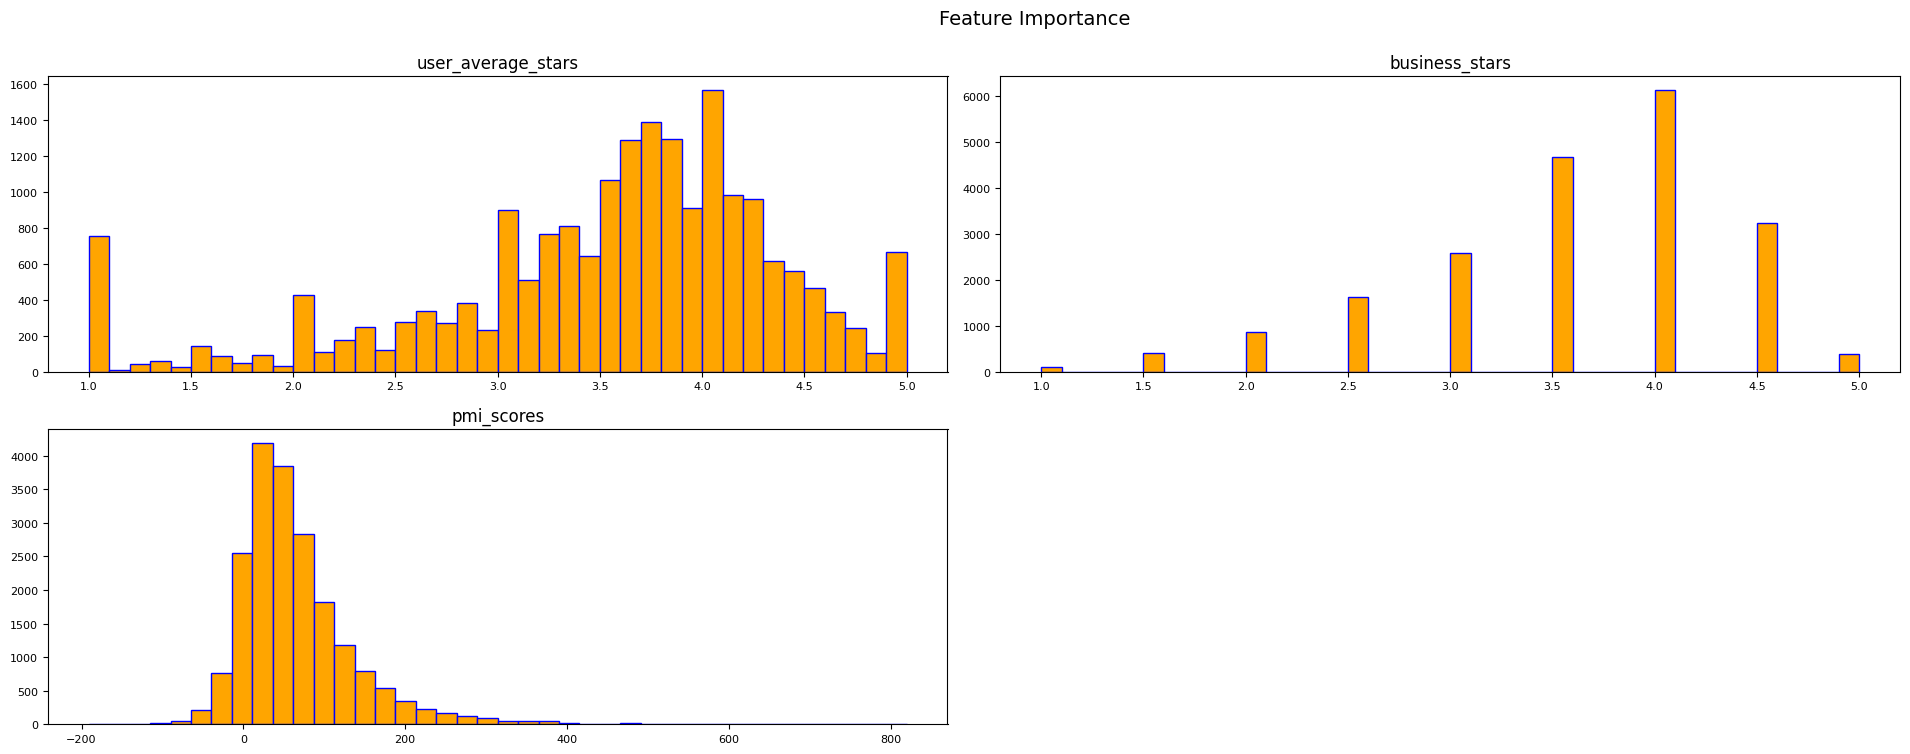

In [34]:
df[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False,
                          figsize=(16,6), color='orange')
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.suptitle('Feature Importance', x=0.65, y=1.25, fontsize=14);

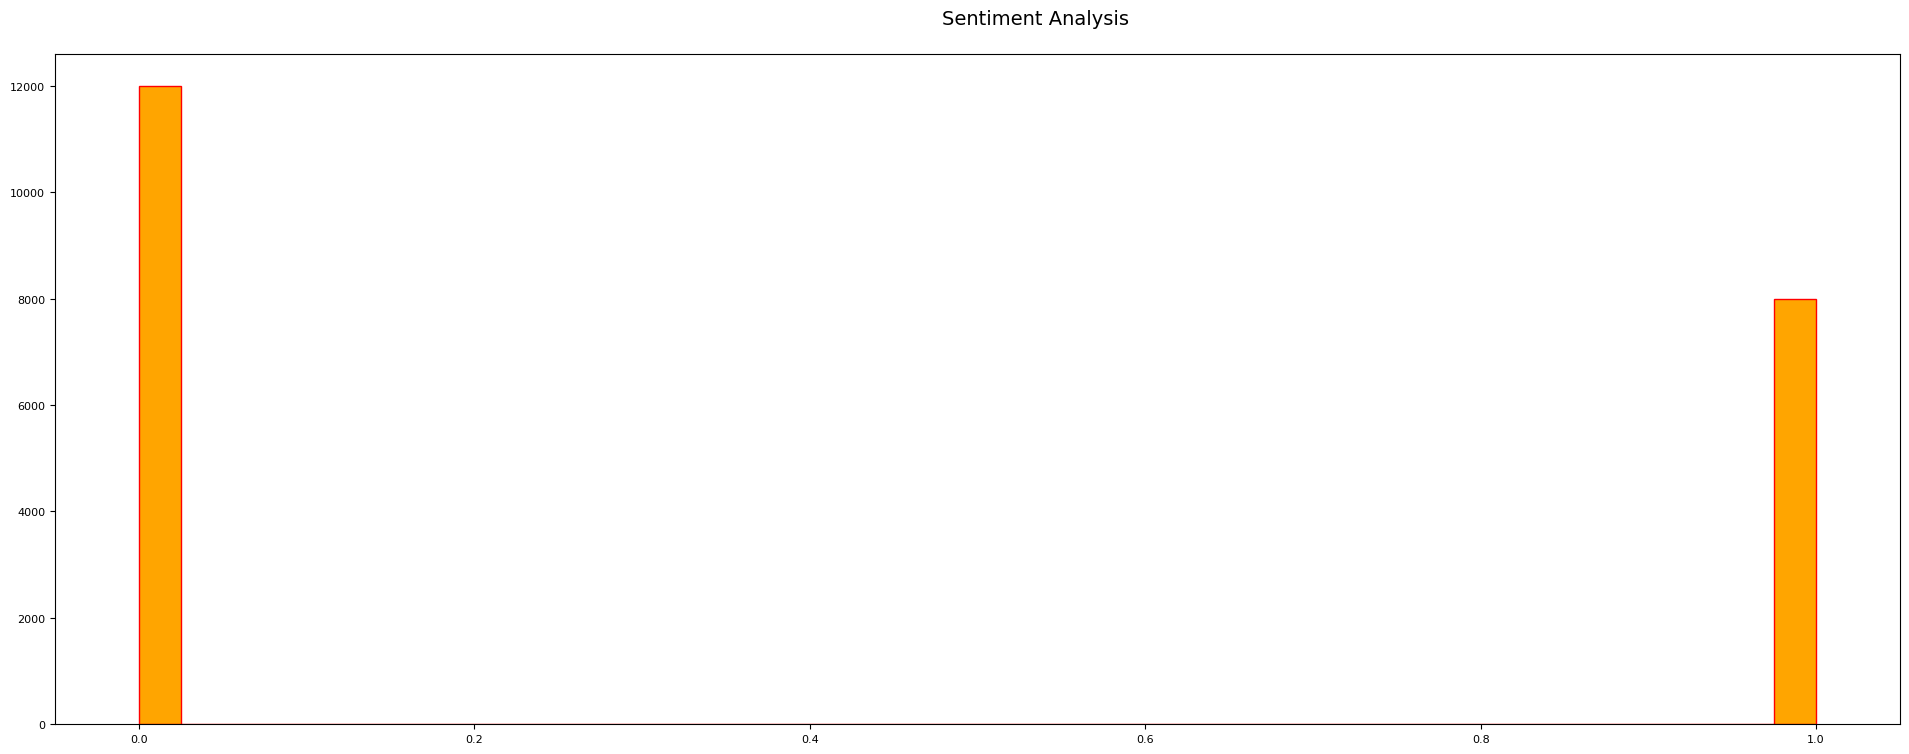

In [35]:
df.stars.hist(bins=40, edgecolor='r', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False,
                          figsize=(16,6), color='orange')
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.suptitle('Sentiment Analysis', x=0.65, y=1.25, fontsize=14);

# **Other Statistical Measures Calculation**

Sentiment Score

In [36]:
balanced_dataset['review_text'] = balanced_dataset['review_text'].astype("string")

In [37]:
balanced_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review_text         20000 non-null  string 
 1   user_average_stars  20000 non-null  float64
 2   business_stars      20000 non-null  float64
 3   pmi_scores          20000 non-null  float64
 4   stars               20000 non-null  int64  
dtypes: float64(3), int64(1), string(1)
memory usage: 781.4 KB


In [38]:
# Compute Sentiment Score
balanced_dataset['Sentiment_Score'] = balanced_dataset['review_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

TF-IDF Score

In [39]:
# Create a TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the reviews
tfidf_matrix = vectorizer.fit_transform(balanced_dataset['review_text'])

# Compute the average TF-IDF score for each review
average_tfidf_scores = tfidf_matrix.mean(axis=1)

# Add the average TF-IDF scores to the DataFrame
balanced_dataset['TFIDF_Score'] = average_tfidf_scores

Flesch Reading Ease and Gunning Fog

In [40]:
# Calculate Flesch Reading Ease score
balanced_dataset['Flesch_Reading_Ease'] = balanced_dataset['review_text'].apply(textstat.flesch_reading_ease)

# Calculate Gunning Fog index
balanced_dataset['Gunning_Fog'] = balanced_dataset['review_text'].apply(textstat.gunning_fog)

In [41]:
feature_names=['user_average_stars','business_stars','pmi_scores','Sentiment_Score','TFIDF_Score','Flesch_Reading_Ease','Gunning_Fog']
Dataset = balanced_dataset[feature_names]
Target = balanced_dataset.stars

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(Dataset,Target, test_size=0.2,random_state=42)

In [43]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, Y_train, Y_test)
models

 97%|█████████▋| 28/29 [01:04<00:02,  2.02s/it]

[LightGBM] [Info] Number of positive: 6416, number of negative: 9584
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1519
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.401000 -> initscore=-0.401300
[LightGBM] [Info] Start training from score -0.401300


100%|██████████| 29/29 [01:04<00:00,  2.22s/it]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.83               0.82     0.82      0.83   
RandomForestClassifier             0.83               0.81     0.81      0.83   
BaggingClassifier                  0.82               0.80     0.80      0.82   
XGBClassifier                      0.81               0.80     0.80      0.80   
LGBMClassifier                     0.80               0.79     0.79      0.80   
SGDClassifier                      0.79               0.79     0.79      0.79   
SVC                                0.80               0.79     0.79      0.80   
RidgeClassifier                    0.79               0.78     0.78      0.79   
RidgeClassifierCV                  0.79               0.78     0.78      0.79   
LabelSpreading                     0.79               0.78     0.78      0.79   
LinearDiscriminantAnalysis         0.79               0.78     0.78      0.79   
LabelPropagation                   0.79               0.78     0.78      0.79   
CalibratedClassifierCV             0.79               0.78     0.78      0.79   
LinearSVC                          0.79               0.78     0.78      0.79   
AdaBoostClassifier                 0.79               0.78     0.78      0.79   
NearestCentroid                    0.77               0.78     0.78      0.77   
LogisticRegression                 0.79               0.78     0.78      0.79   
NuSVC                              0.79               0.78     0.78      0.79   
PassiveAggressiveClassifier        0.76               0.77     0.77      0.76   
QuadraticDiscriminantAnalysis      0.76               0.77     0.77      0.76   
KNeighborsClassifier               0.78               0.77     0.77      0.78   
GaussianNB                         0.76               0.76     0.76      0.76   
DecisionTreeClassifier             0.77               0.76     0.76      0.77   
Perceptron                         0.76               0.76     0.76      0.76   
BernoulliNB                        0.77               0.76     0.76      0.77   
ExtraTreeClassifier                0.76               0.75     0.75      0.76   
DummyClassifier                    0.60               0.50     0.50      0.45   

                               Time Taken  
Model                                      
ExtraTreesClassifier                 1.55  
RandomForestClassifier               3.13  
BaggingClassifier                    1.27  
XGBClassifier                        0.29  
LGBMClassifier                       0.29  
SGDClassifier                        0.13  
SVC                                  9.78  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.07  
LabelSpreading                      16.69  
LinearDiscriminantAnalysis           0.10  
LabelPropagation                     9.86  
CalibratedClassifierCV               4.57  
LinearSVC                            0.97  
AdaBoostClassifier                   0.94  
NearestCentroid                      0.03  
LogisticRegression                   0.06  
NuSVC                               13.65  
PassiveAggressiveClassifier          0.04  
QuadraticDiscriminantAnalysis        0.03  
KNeighborsClassifier                 0.38  
GaussianNB                           0.03  
DecisionTreeClassifier               0.18  
Perceptron                           0.04  
BernoulliNB                          0.04  
ExtraTreeClassifier                  0.04  
DummyClassifier                      0.02

In [44]:
RF_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
pred = RF_classifier.fit(X_train, Y_train)

# Make predictions on the test set
predictions = pred.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(Y_test, predictions))

Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2416
           1       0.79      0.76      0.78      1584

    accuracy                           0.83      4000
   macro avg       0.82      0.81      0.82      4000
weighted avg       0.83      0.83      0.83      4000



# **XAI Implementation**

In [45]:
from alibi.explainers import AnchorTabular
predict_func = lambda x: RF_classifier.predict_proba(x)

explainer = AnchorTabular(predict_func, feature_names)
predict_func=lambda x:RF_classifier.predict_proba(x)
explainer=AnchorTabular(predict_func,feature_names)

In [46]:
RF_classifier.predict_proba(X_test)

array([[0.92, 0.08],
       [0.99, 0.01],
       [0.82, 0.18],
       ...,
       [0.82, 0.18],
       [0.89, 0.11],
       [0.36, 0.64]])

In [47]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()

In [48]:
explainer.fit(X_train)

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': None, 'disc_perc': (25, 50, 75)},
  'version': '0.9.4'}
)

In [49]:
import sklearn.metrics
import sklearn

In [50]:
inst=1
target_label=['negative','positive']
print('Review is',target_label[explainer.predictor(X_test[inst].reshape(1, -1))[0]])
anchor=explainer.explain(X_test[inst])
print('Anchor generated feature(/s)',anchor.anchor)

Review is negative
Anchor generated feature(/s) ['Sentiment_Score <= 0.04', 'user_average_stars <= 3.14']


In [51]:
from sklearn import metrics

In [52]:

# We design a simple classification evaluative function
def evaluation_scores(test, prediction, target_names=None):
    print('Accuracy:', np.round(metrics.accuracy_score(test, prediction), 4))
    print('-'*60)
    print('classification report:\n\n', metrics.classification_report(y_true=test, y_pred=prediction, target_names=target_names))

    classes = [0, 1]
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=test, y_pred=prediction, labels=classes)
    cm_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(levels=[['Predicted:'], classes], labels=level_labels),
                            index=pd.MultiIndex(levels=[['Actual:'], classes], labels=level_labels))

    print('-'*60)
    print('Confusion matrix:\n')
    print(cm_frame)

In [53]:
from sklearn.metrics import jaccard_score
yjc = RF_classifier.predict(X_test)
jaccard_score(yjc, Y_test)

0.6331049024775962

In [54]:
evaluation_scores(Y_test, yjc, target_names=['Low Quality', 'High Quality'])

Accuracy: 0.826
------------------------------------------------------------
classification report:

               precision    recall  f1-score   support

 Low Quality       0.85      0.87      0.86      2416
High Quality       0.79      0.76      0.78      1584

    accuracy                           0.83      4000
   macro avg       0.82      0.81      0.82      4000
weighted avg       0.83      0.83      0.83      4000



TypeError: ignored

In [55]:
df2=balanced_dataset.copy()
target='stars'
features_list = list(df2.columns)
features_list.remove(target)

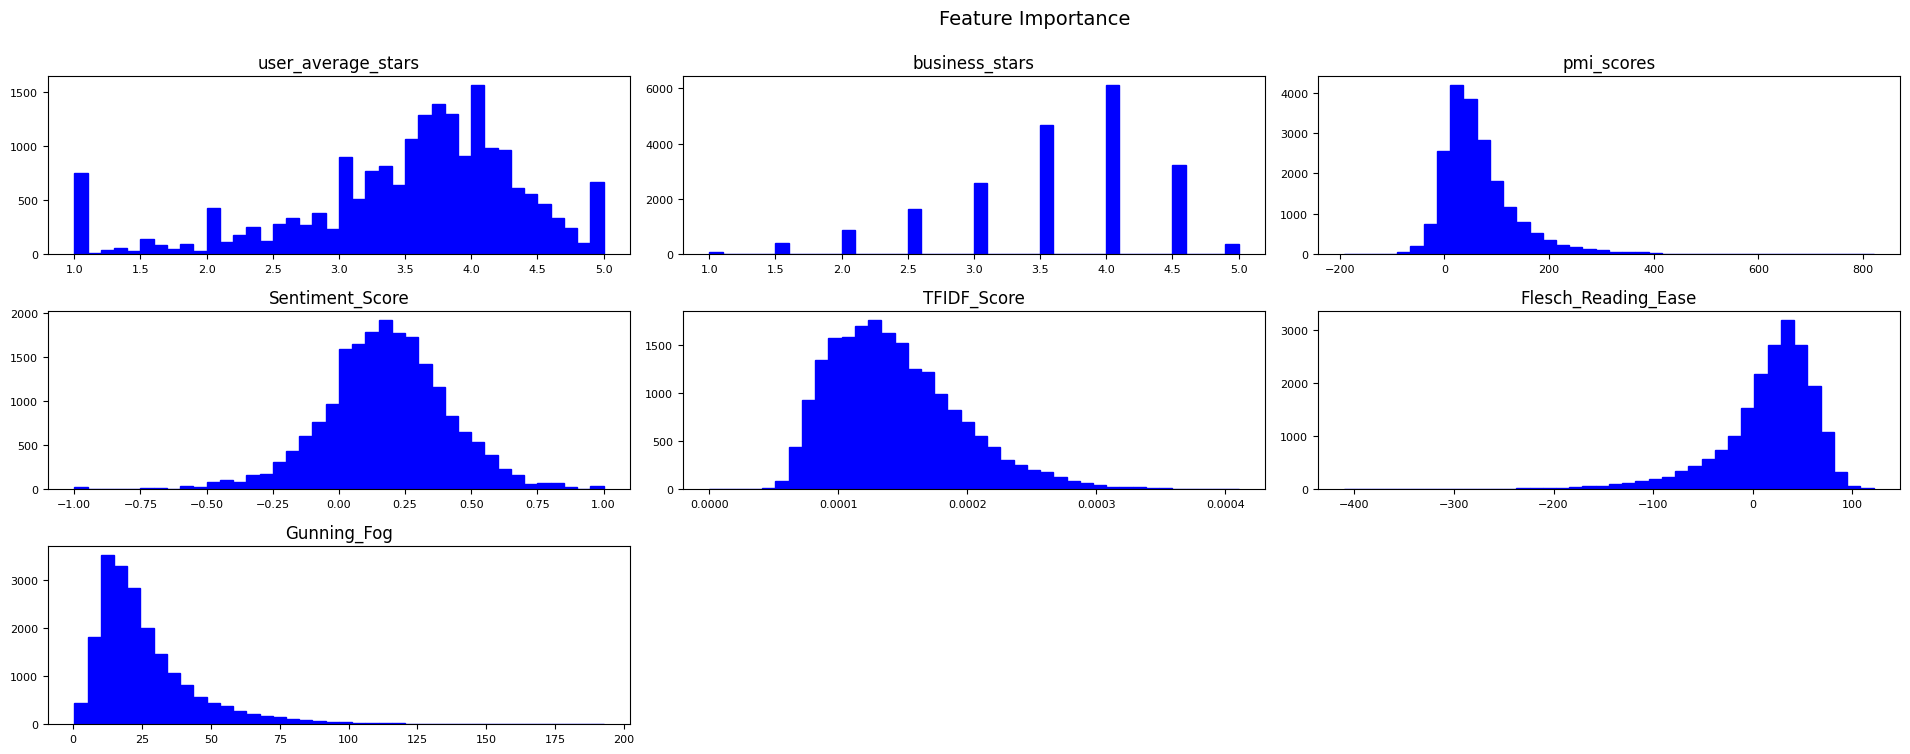

In [56]:
df2[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False,
                          figsize=(16,6), color='blue')
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.suptitle('Feature Importance', x=0.65, y=1.25, fontsize=14);

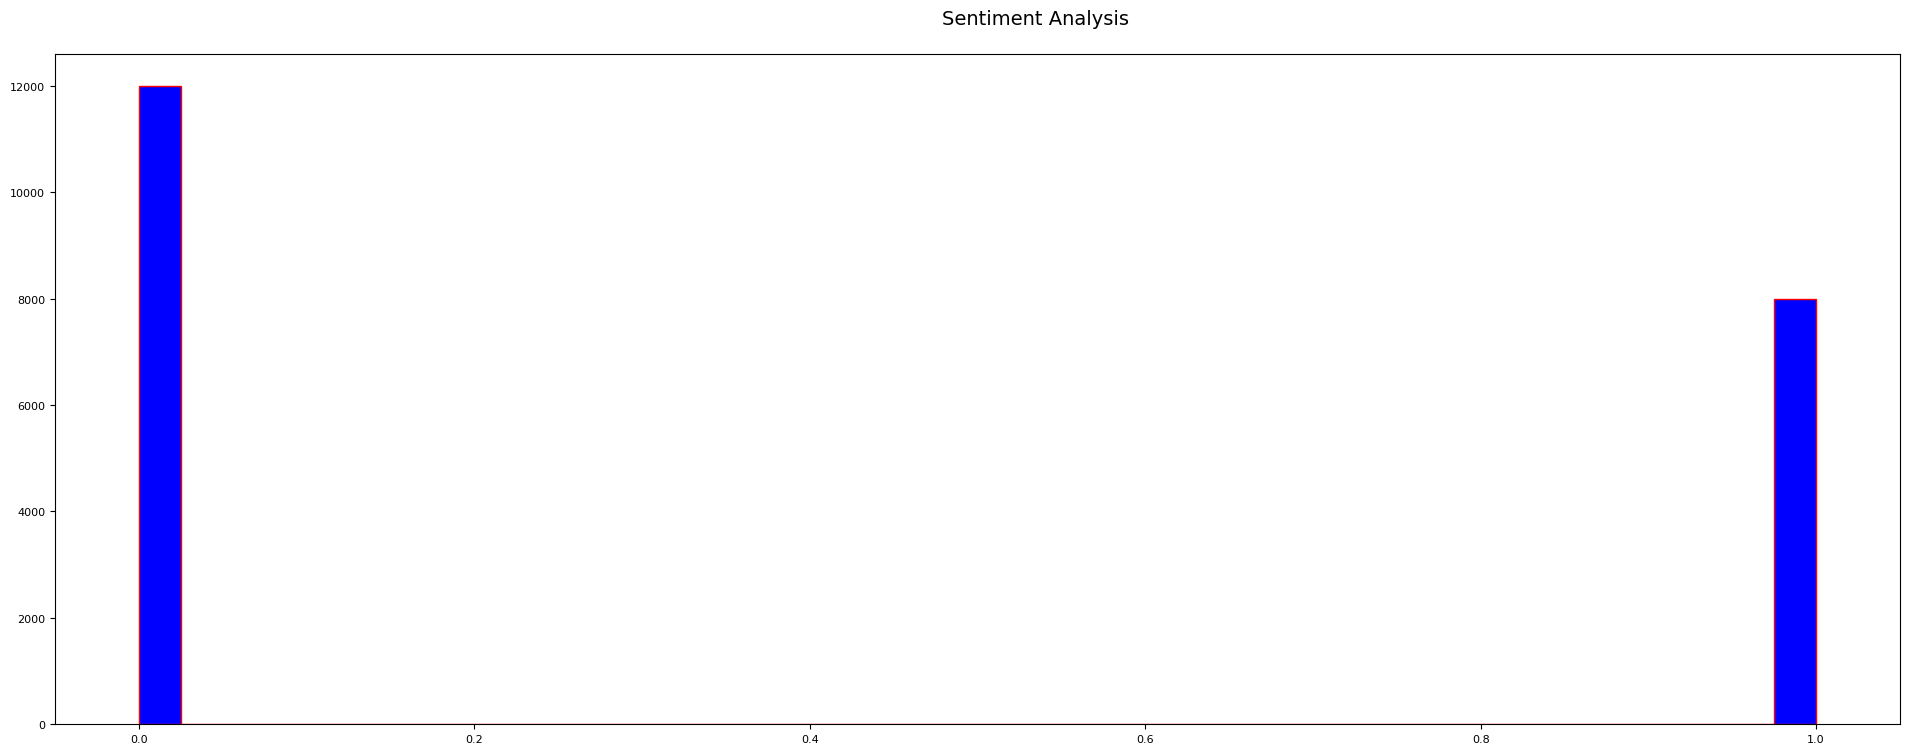

In [57]:
df2.stars.hist(bins=40, edgecolor='r', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False,
                          figsize=(16,6), color='blue')
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.suptitle('Sentiment Analysis', x=0.65, y=1.25, fontsize=14);

In [58]:
import eli5
from eli5.sklearn import PermutationImportance

In [59]:
from pdpbox import pdp, info_plots

In [60]:
def plot_pdp(model, df, feature, cluster_flag=False, nb_clusters=None, lines_flag=False):
    pdp_goals = pdp.pdp_isolate(model=model, dataset=df, model_features=df.columns.tolist(), feature=feature)
    pdp.pdp_plot(pdp_goals, feature, cluster=cluster_flag, n_cluster_centers=nb_clusters, plot_lines=lines_flag)
    plt.show()

In [61]:
column_names = ['user_average_stars','business_stars','pmi_scores','Sentiment_Score','TFIDF_Score','Flesch_Reading_Ease','Gunning_Fog']
X_train_df = pd.DataFrame(X_train, columns=column_names)
X_test_df = pd.DataFrame(X_test, columns=column_names)

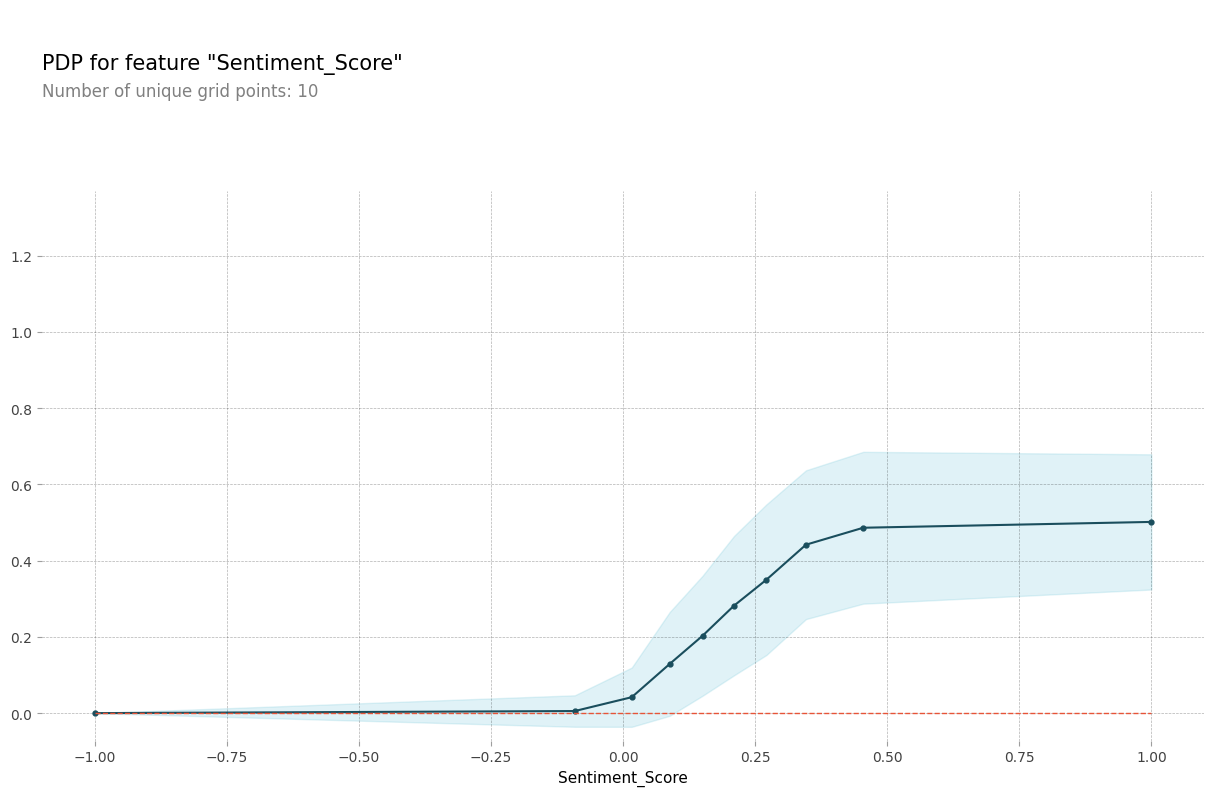

In [62]:
plot_pdp(pred, X_train_df, 'Sentiment_Score')

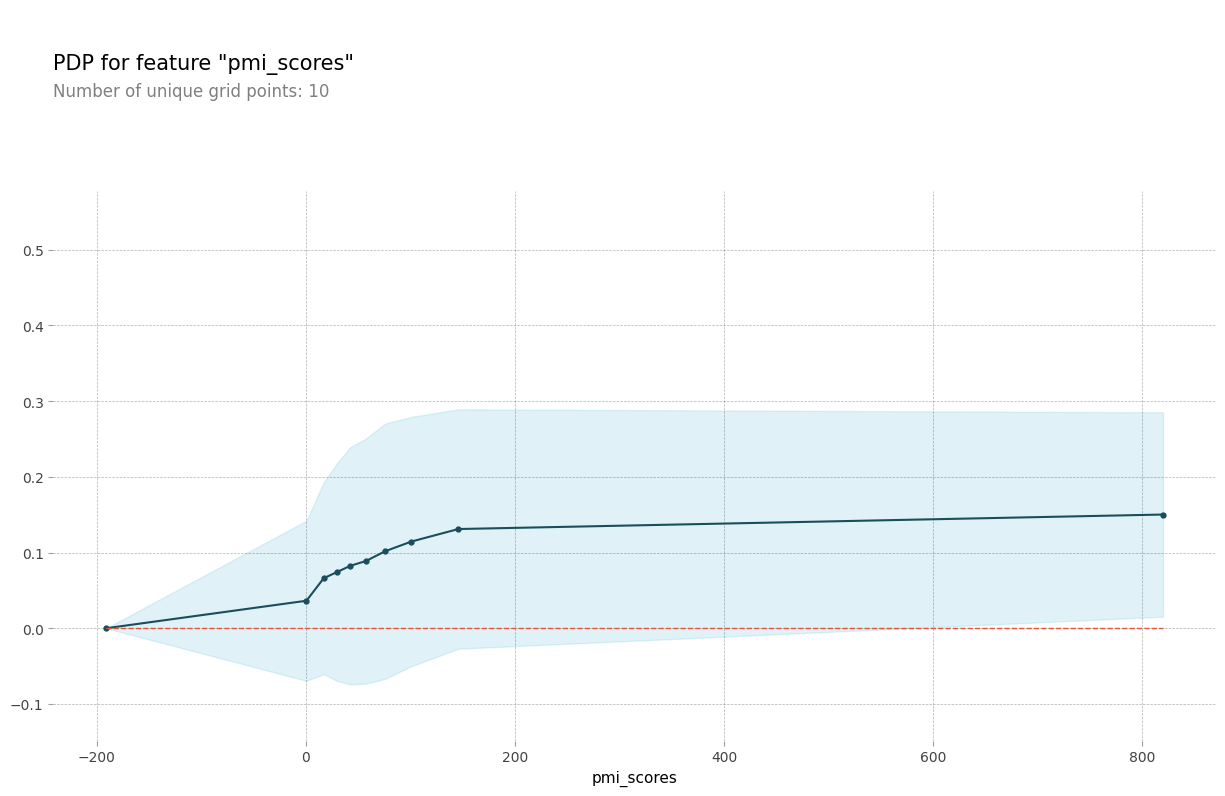

In [63]:
plot_pdp(pred, X_train_df, 'pmi_scores')

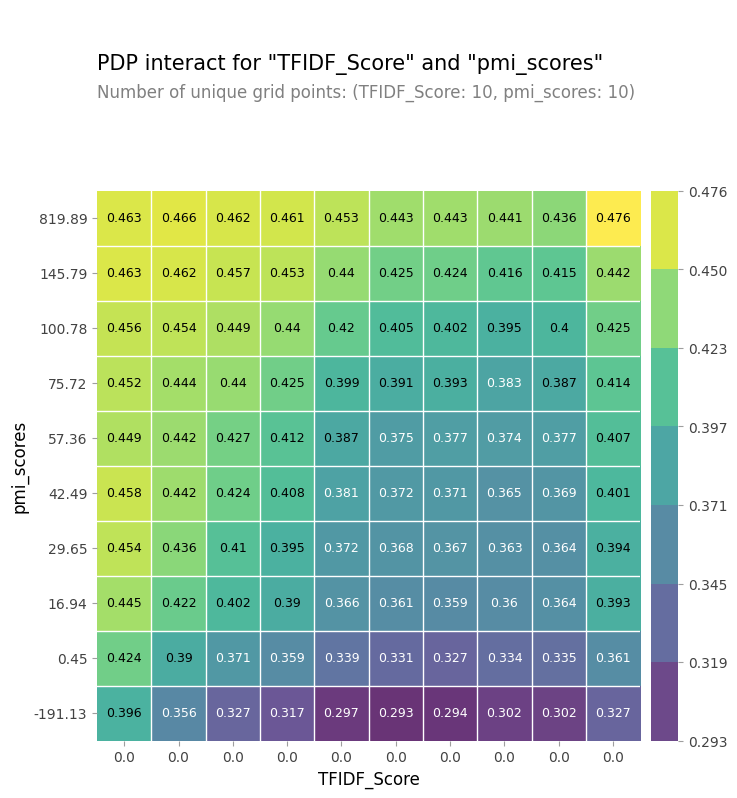

In [64]:
features_to_plot = ['TFIDF_Score', 'pmi_scores']
inter1  =  pdp.pdp_interact(model=pred, dataset=X_train_df, model_features=column_names, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='grid')
plt.show()

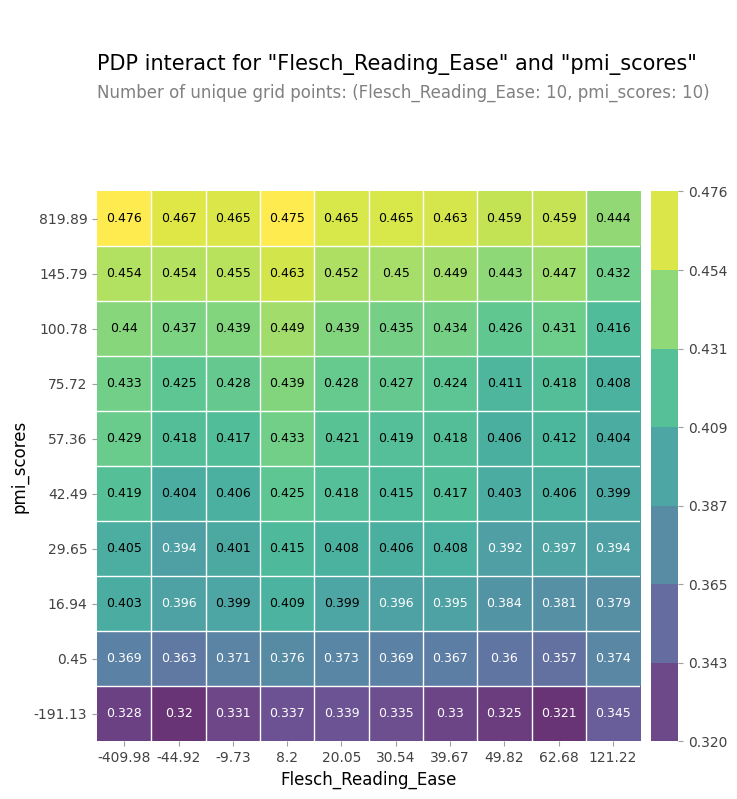

In [65]:
features_to_plot = ['Flesch_Reading_Ease', 'pmi_scores']
inter1  =  pdp.pdp_interact(model=pred, dataset=X_train_df, model_features=column_names, features=features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='grid')
plt.show()

In [66]:
eli5.show_weights(RF_classifier, top=30)

In [67]:
tgt = 4
print('Reference:', Y_test.iloc[tgt])
print('Predicted:', predictions[tgt])
eli5.show_prediction(pred, X_test_df.iloc[tgt],
                     feature_names=list(column_names), show_feature_values=True)

Reference: 1
Predicted: 1


In [70]:
import lime
import lime.lime_tabular


exp = lime.lime_tabular.LimeTabularExplainer(X_test_df.values, feature_names=column_names, discretize_continuous=True)

In [71]:
tgt = 4
print('Reference:', Y_test.iloc[tgt])
print('Predicted:', predictions[tgt])
exp.explain_instance(X_test_df.iloc[tgt].values, RF_classifier.predict_proba).show_in_notebook()

Reference: 1
Predicted: 1


In [72]:
tgt = 8
print('Reference:', Y_test.iloc[tgt])
print('Predicted:', predictions[tgt])
exp.explain_instance(X_test_df.iloc[tgt].values, RF_classifier.predict_proba).show_in_notebook()

Reference: 1
Predicted: 1


In [73]:
import shap
shap.initjs()

In [74]:
explainer = shap.TreeExplainer(pred)
shap_values = explainer.shap_values(X_test)
shap_values

[array([[ 0.05876241,  0.16374587, -0.01775636, ...,  0.01664504,
          0.00726395,  0.01731037],
        [ 0.16664546, -0.03906042,  0.05233849, ..., -0.01228221,
          0.00410665,  0.00144251],
        [ 0.0478337 ,  0.12024566, -0.00270018, ..., -0.00189154,
          0.00486714, -0.01872939],
        ...,
        [-0.02784889, -0.00507408,  0.07968343, ...,  0.09718614,
          0.05435256,  0.0257226 ],
        [-0.06323452,  0.14488563,  0.12272654, ..., -0.00953982,
         -0.0049576 , -0.00772834],
        [ 0.05020516, -0.0241725 , -0.00990847, ..., -0.01353745,
         -0.00823987,  0.01458906]]),
 array([[-0.05876241, -0.16374587,  0.01775636, ..., -0.01664504,
         -0.00726395, -0.01731037],
        [-0.16664546,  0.03906042, -0.05233849, ...,  0.01228221,
         -0.00410665, -0.00144251],
        [-0.0478337 , -0.12024566,  0.00270018, ...,  0.00189154,
         -0.00486714,  0.01872939],
        ...,
        [ 0.02784889,  0.00507408, -0.07968343, ..., -

In [75]:
X_shap = pd.DataFrame(np.row_stack(shap_values))
X_shap.tail()

0     1     2     3     4     5     6
7995 -0.05 -0.07 -0.00 -0.23 -0.02  0.01  0.01
7996 -0.22  0.02 -0.02 -0.09 -0.03 -0.01  0.01
7997  0.03  0.01 -0.08  0.00 -0.10 -0.05 -0.03
7998  0.06 -0.14 -0.12 -0.11  0.01  0.00  0.01
7999 -0.05  0.02  0.01  0.25  0.01  0.01 -0.01

In [76]:
print('Expected Value: ', explainer.expected_value)

Expected Value:  [0.59921938 0.40078063]


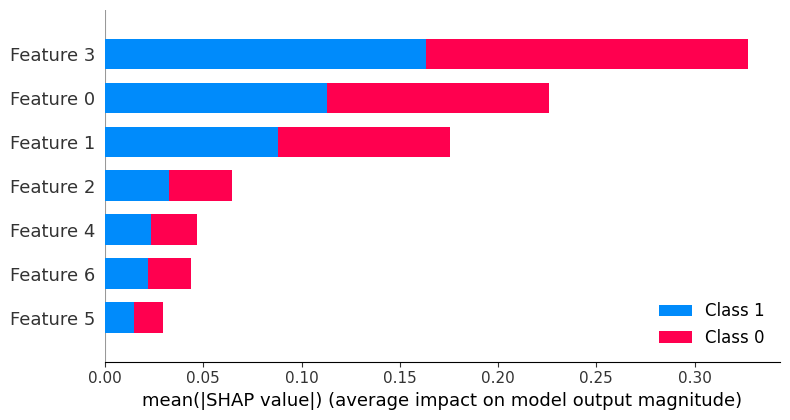

In [77]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [78]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test_df.iloc[0:])

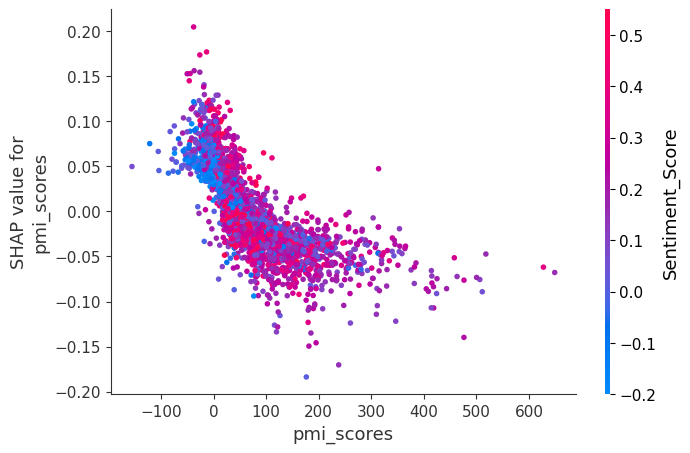

In [80]:
shap.initjs()
shap.dependence_plot(ind='pmi_scores', interaction_index='Sentiment_Score',
                     shap_values=shap_values[0],
                     features=X_test_df,
                     display_features=X_test_df)

# **XAI with Hyper Paramenter Tuning**

In [81]:
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(X_train_df, Y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_df)

# Evaluate the model
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(Y_test, predictions))


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2416
           1       0.79      0.78      0.79      1584

    accuracy                           0.83      4000
   macro avg       0.83      0.82      0.82      4000
weighted avg       0.83      0.83      0.83      4000

